In [35]:
import pandas as pd
df = pd.read_csv("robot_maintenancecsv.csv")


In [54]:
import numpy as np

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [37]:
df = df.dropna()  

In [38]:
df['battery_drop'] = df['battery_percent'].diff().fillna(0)
df['temp_avg'] = df['cpu_temp_c'].rolling(3).mean().bfill()


In [39]:
df['error_code_encoded'] = df['error_code'].astype('category').cat.codes

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: title={'center': 'Battery Over Time'}, xlabel='timestamp'>

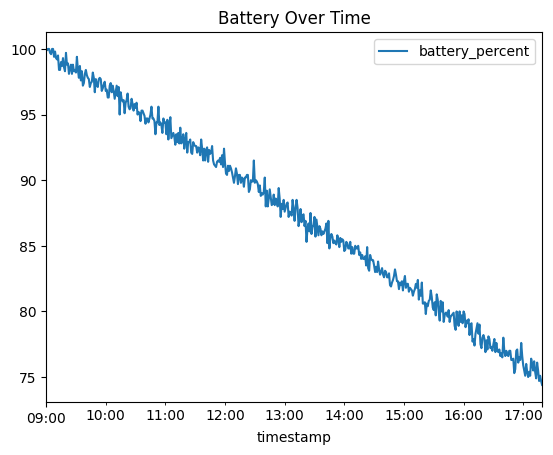

In [41]:
# Battery % over time
df.plot(x='timestamp', y='battery_percent', title='Battery Over Time')


<Axes: xlabel='cpu_temp_c', ylabel='Count'>

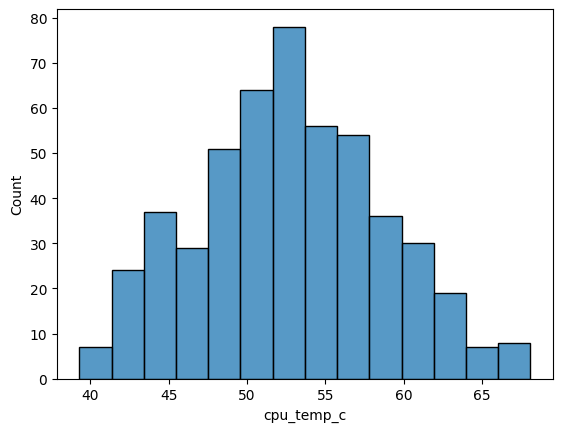

In [42]:
# CPU temp histogram
sns.histplot(df['cpu_temp_c'])


<Axes: xlabel='error_code', ylabel='count'>

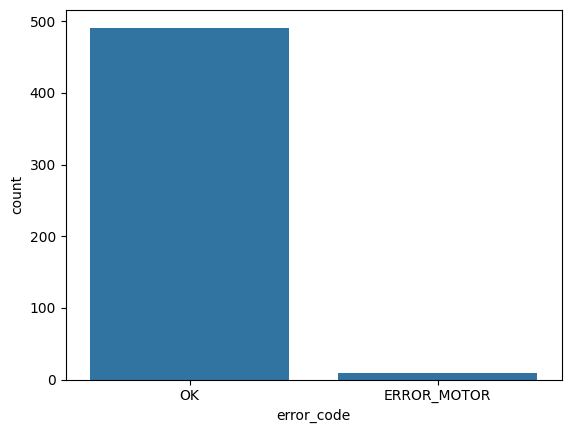

In [43]:
# Error count
sns.countplot(data=df, x='error_code')


<Axes: >

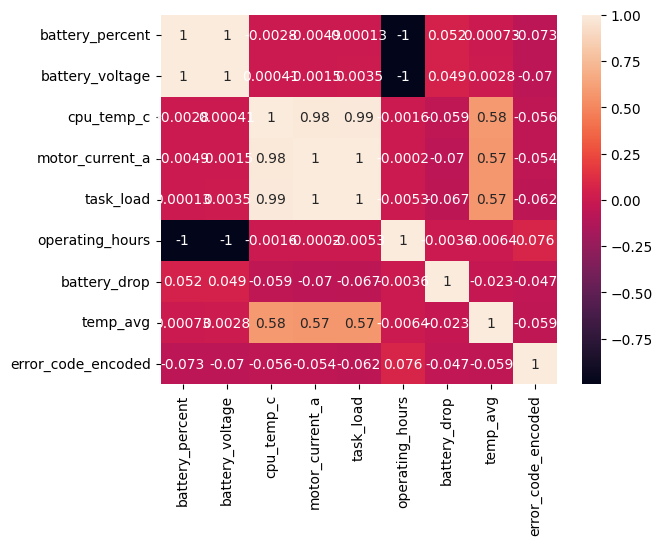

In [44]:

# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True)


# Step 3: Feature Engineering

In [45]:
df['hour'] = df['timestamp'].dt.hour
df['is_low_battery'] = df['battery_percent'] < 20
df['task_load_avg'] = df['task_load'].rolling(5).mean().bfill()


#  Step 4: Model Building


In [46]:
from sklearn.model_selection import train_test_split

features = ['battery_percent', 'cpu_temp_c', 'motor_current_a', 'task_load']
X = df[features]
y = df['error_code_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [2]:
from sklearn.metrics import precision_score

#precision_score(y_test, y_pred, average='weighted', zero_division=0)
y_pred = np.argmax(model.predict_proba(X_test), axis=1)



NameError: name 'np' is not defined

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


NameError: name 'model' is not defined

In [58]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score, root_mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


Intercept: 1.0319111453888659
Coefficients: [-0.00075149  0.00053841  0.06031149 -0.35867679]
R² Score: 0.03134671982216353
RMSE: 0.13778825890287455
